In [70]:
## import libraries

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

In [88]:
### data

#X,y = make_classification(n_samples = 1000,n_classes=2, n_informative=3, n_redundant=10, n_clusters_per_class=1,n_repeated=2,flip_y=0.2,class_sep=0.5,random_state=42)

from sklearn.datasets import load_digits
digits = load_digits()
X,y_data = digits.data, digits.target

digit_to_classify = 9
y = (y_data== digit_to_classify)
## train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
### created a dummy model with default as 0 output
dummy_model_prob = [0 for _ in range(len(y_test))]

In [90]:
## create a basic logistic model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [91]:
## prediction based on probability
model_prob = model.predict_proba(X_test)[:,1]
model_prob

array([3.25503351e-09, 9.99977287e-01, 1.84844841e-06, 1.46743286e-02,
       5.41243442e-13, 3.10028699e-10, 6.37834430e-08, 5.42003930e-08,
       3.38042443e-14, 5.15966300e-30, 1.18159767e-13, 7.56714287e-05,
       4.59107763e-17, 1.71514609e-11, 4.51887195e-29, 3.26419682e-20,
       1.40442465e-04, 5.24786401e-10, 7.59061624e-03, 1.34537360e-09,
       3.91871925e-20, 9.19613098e-09, 9.99718241e-01, 4.78556084e-16,
       1.44301651e-07, 4.68812493e-24, 2.45976331e-06, 8.13092338e-11,
       4.00082369e-20, 1.00269702e-14, 1.80252526e-32, 9.99916706e-01,
       5.60954376e-14, 7.79411696e-28, 2.44945151e-06, 1.29214903e-18,
       1.00000000e+00, 9.00450140e-31, 2.89000135e-09, 1.08726092e-19,
       2.79884392e-13, 9.99816344e-01, 6.39408398e-16, 2.63573928e-10,
       3.29667029e-24, 4.25446061e-07, 6.89315642e-10, 3.25235441e-06,
       2.83279584e-24, 2.08862819e-06, 2.15133476e-04, 1.80696000e-14,
       8.91670061e-01, 7.80396807e-07, 7.40147929e-12, 9.21802715e-11,
      

In [92]:
## scores
y_test = model.predict(X_test)
print(len(y_test))
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

360
0.5
1.0


In [93]:
### roc curve

dummy_fpr, dummy_tpr, tresholds = roc_curve(y_test,dummy_model_prob)
model_fpr, model_tpr, tresholds = roc_curve(y_test,model_prob)

# Check the actual lengths:
print("Length of model_fpr:", len(model_fpr))
print("Length of model_tpr:", len(model_tpr))


Length of model_fpr: 4
Length of model_tpr: 4


In [94]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model_prob > 0.5).astype(int)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check feature importances
print("\nModel coefficients:")
print(model.coef_)

Confusion Matrix:
[[320   0]
 [  0  40]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       320
        True       1.00      1.00      1.00        40

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360


Model coefficients:
[[ 0.00000000e+00 -7.09606192e-01 -3.12033825e-01  8.43350887e-01
  -5.87580558e-02 -1.52589598e-01 -8.23466881e-03 -3.49681492e-01
  -7.17968195e-03  6.38604297e-02  4.53848436e-01  2.84031220e-01
  -3.01654124e-02  7.73369787e-02  4.11674650e-01  1.23629396e-01
  -9.15579054e-02  7.91551204e-02  3.67582666e-01  3.06633612e-01
   2.10929607e-01  8.62084141e-01 -2.97843660e-01 -3.17803214e-01
  -4.53438366e-02 -2.38916050e-02  5.40672988e-01  4.91278595e-01
  -1.16565731e-01  4.72477912e-01  2.60340366e-01  3.02988040e-03
   0.00000000e+00 -1.66448732e+00 -3.11882453e-01  5.108742

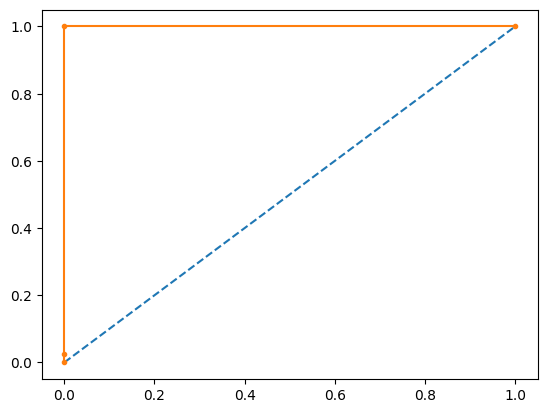

In [95]:
## plot the rco curve

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dummy_fpr, dummy_tpr, linestyle='--',label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic model')

C:\Users\Shrinath\AppData\Local\Temp\ipykernel_10148\3942204140.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


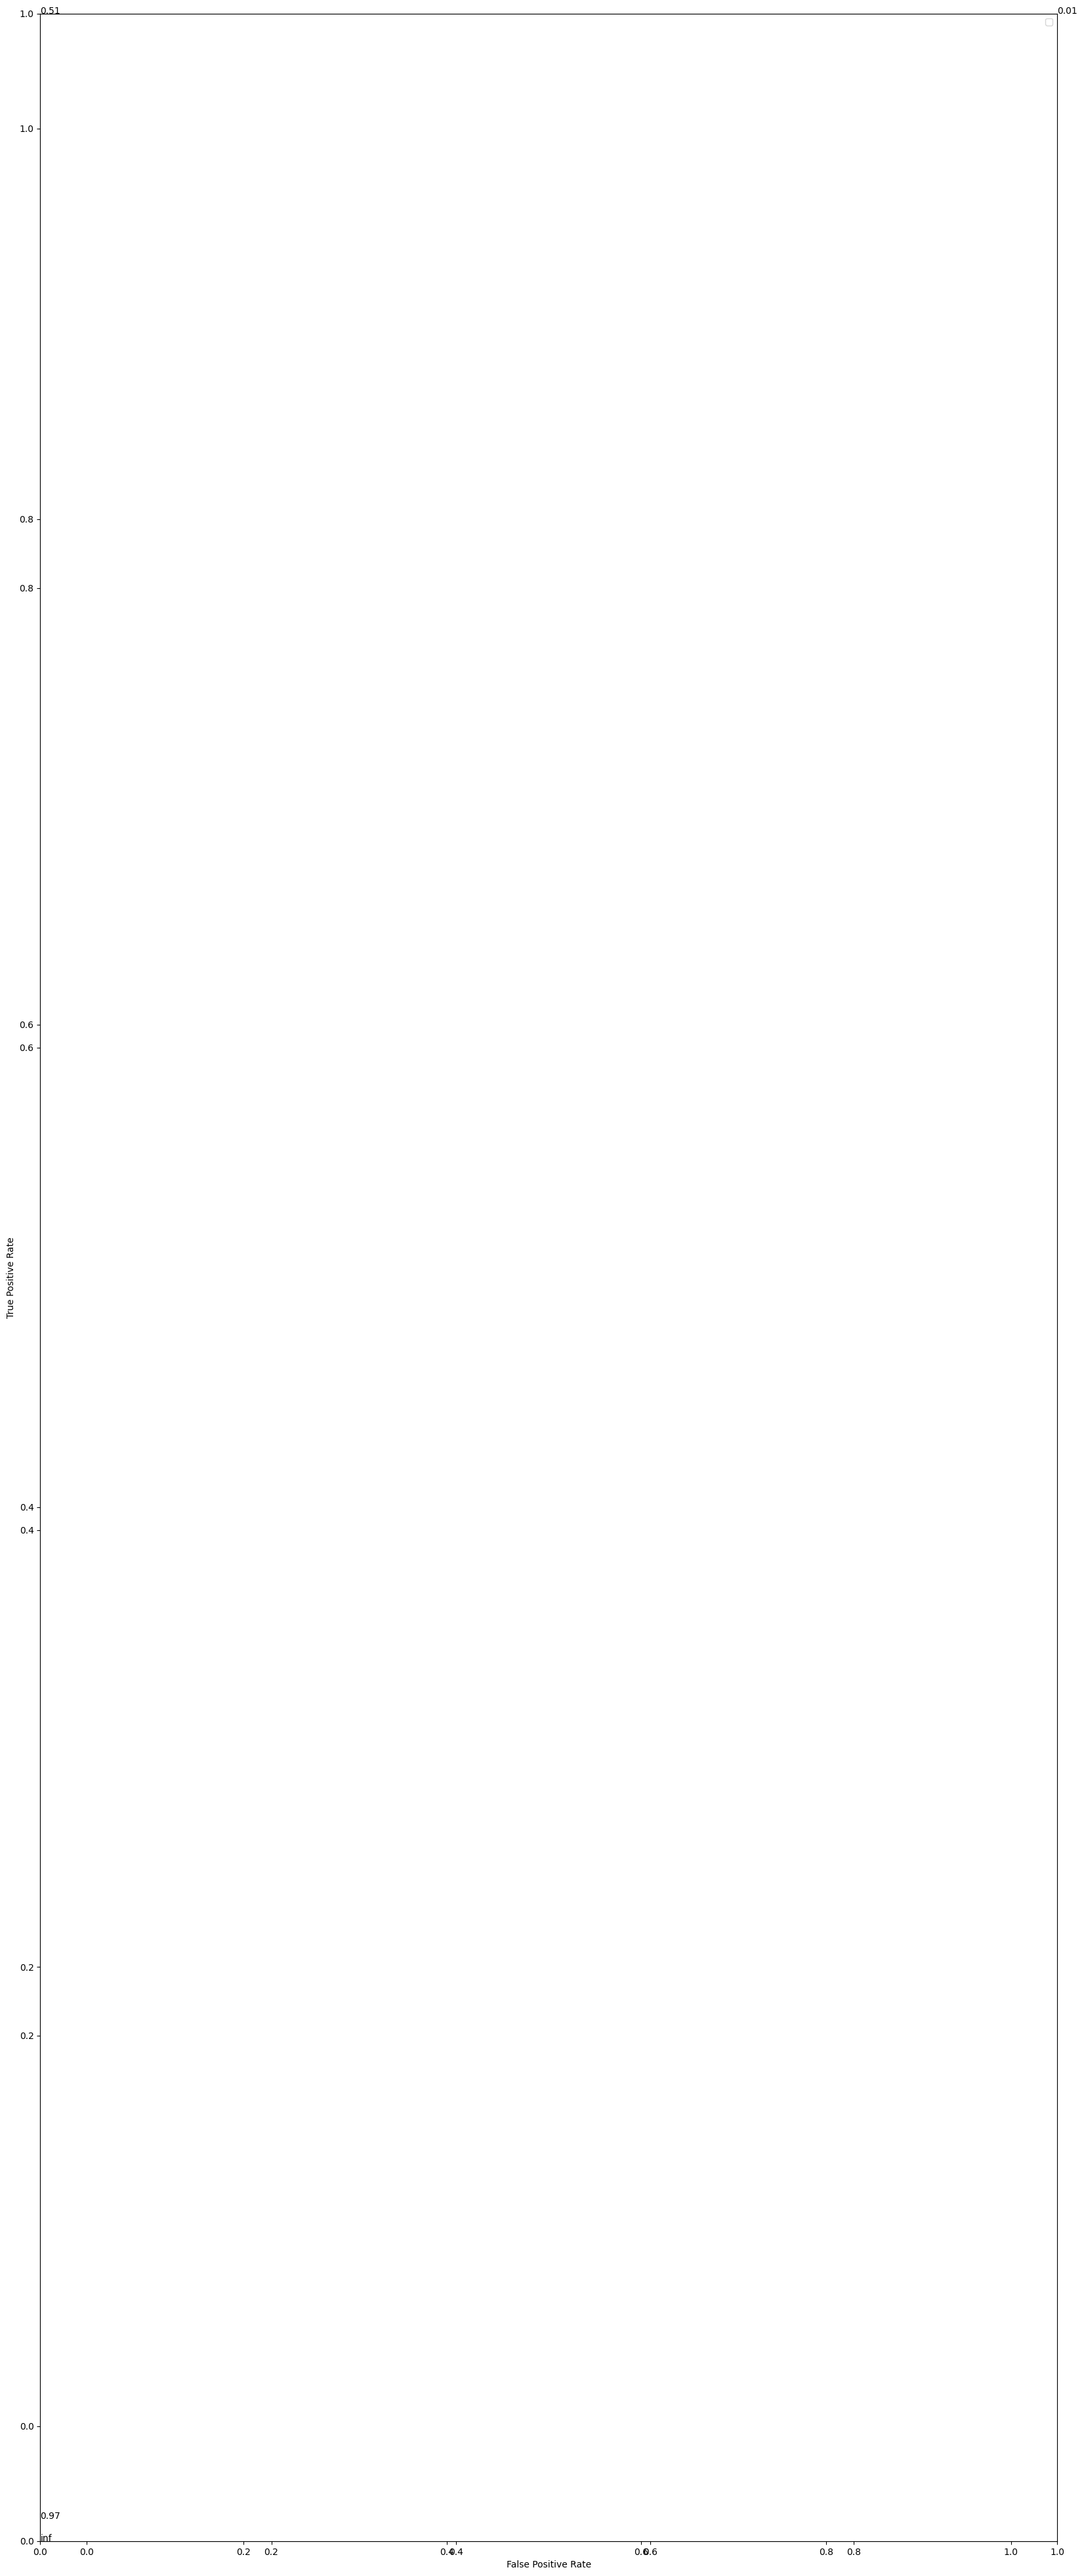

In [81]:
import numpy as np

fig = plt.figure(figsize=(20,50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
plt.plot(model_fpr, model_tpr, marker='.',label='logistic')
ax = fig.add_subplot(111)
for xyz in zip(model_fpr, model_tpr, tresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()